In [9]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/ro-en/train.roen.df.short.tsv"
DEV_FILE = "data/ro-en/dev.roen.df.short.tsv"
TEST_FILE = "data/ro-en/test20.roen.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,"După doar 200 de metri, ajungem la Foișorul Bă...","Only 200 metres later, we arrive at the Former...",-1.730965
1,1,Guvernul numește un prefect în fiecare județ p...,The Government appoints a prefect to each coun...,0.851625
2,2,"În 1979, sovieticii au invadat Afghanistan, ia...","In 1979, the Soviets invaded Afghanistan and t...",1.060160
3,3,O treime din casele sale au fost avariate sau ...,One third of his homes have been damaged or de...,0.744143
4,4,Înaintea introducerii tramvaiului la Galați se...,Before the tram was introduced in Galats it wo...,0.634248
5,5,"A doua zi, gărzile de la depozitul din Concord...","The day two, the fences at the connection site...",0.544929
6,6,"Are o industrie turistică bine dezvoltată, fii...",It has a well-developed tourist industry as a ...,1.085552
7,7,Femeile sunt mai numeroase după vârsta de 30 d...,Women are more numerous after the age of 30.,0.939408
8,8,"În mai 1915, Italia invadeză Austria și pierde...","In May 1915, Italy invaded Austria and lost 20...",1.083785
9,9,Tratatul de Aderare fusese semnat la 16 aprili...,The Accession Treaty had been signed on 16 Apr...,0.622639


In [10]:
train.describe()

,z_mean
count,7000.000000
mean,0.012194
std,0.964497
min,-2.708876
25%,-0.671754
50%,0.333226
75%,0.844546
max,1.273511


In [11]:
dev.describe()

,z_mean
count,1000.000000
mean,-0.052080
std,0.955379
min,-2.599724
25%,-0.762740
50%,0.157865
75%,0.821107
max,1.126191


mean-original 15.11 std-original 4.66 mean-translation 15.58 std-translation 5.13 max-original 31.00 max-translation 49.00


<Figure size 432x288 with 0 Axes>

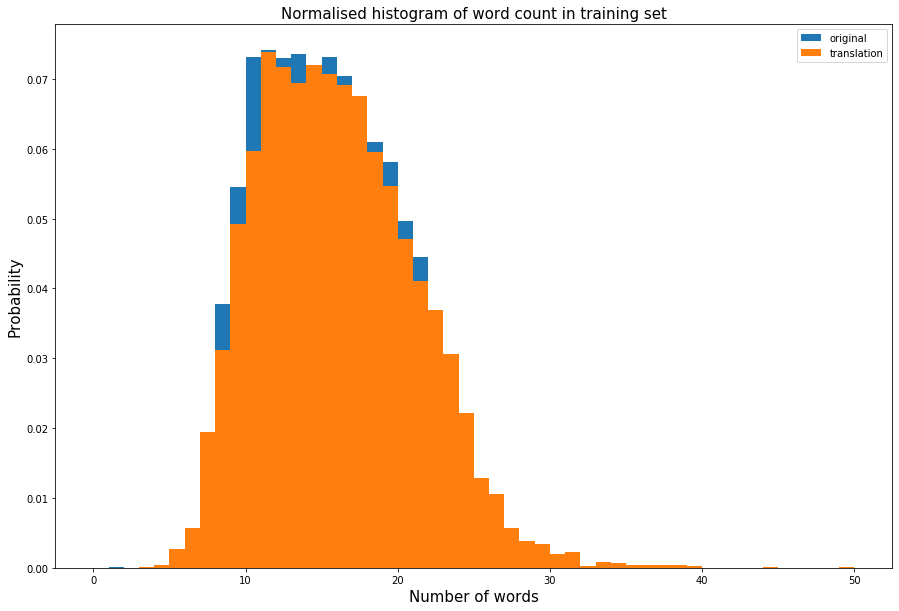

In [12]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 15.17 std-original 4.60 mean-translation 15.68 std-translation 5.10 max-original 29.00 max-translation 34.00


<Figure size 432x288 with 0 Axes>

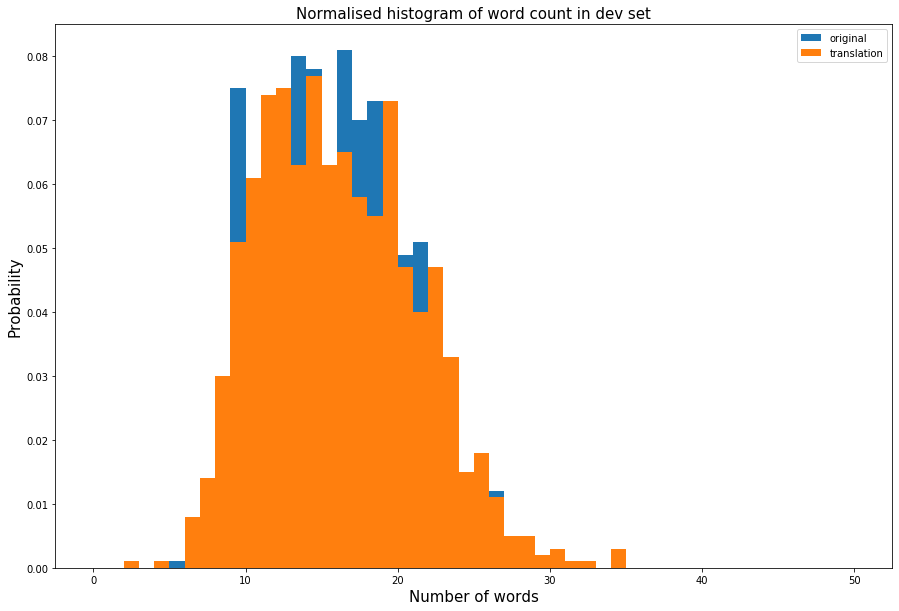

In [13]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))



